# Modeling Telco data with XGBOOST algorithm
Samar Amini, </br>
June 2022

In [39]:
import pandas as pd
import numpy as np

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

### Reading train data

In [2]:
df = pd.read_csv('../Data/churn_train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


### Analysing the dataset

In [4]:
df.shape

(5634, 21)

> #### Dataset (training part) has 5634 datapoints with 21 attributes.

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

> #### Dropping CustomerID column, since it looks useless.

In [6]:
df = df.drop(['customerID'], axis=1)

#### Looking for Nulls: 

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### The datatype of column Totalcharges is object. But they are actualy float numbers and we need to make them numeric.

In [8]:
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

#### Again checking for Nulls for this column:

In [9]:
Nulls = pd.isnull(df['TotalCharges'])
df[Nulls]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1832,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
2121,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2347,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
2651,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2703,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3294,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3999,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5162,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


#### There are 8 null values and we need to remove them.

In [10]:
df = df.dropna()
df.shape

(5626, 20)

                  Histogram of Total charges


<AxesSubplot:>

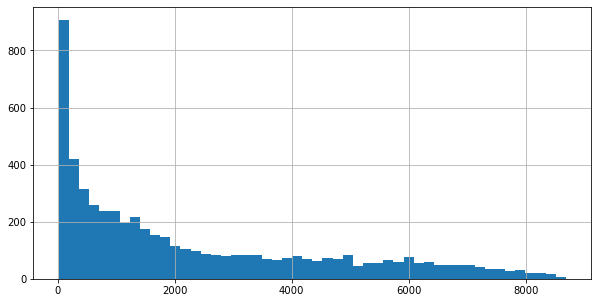

In [15]:
print("                  Histogram of Total charges")
df.TotalCharges.hist(bins=50)

                  Histogram of Churn


<AxesSubplot:>

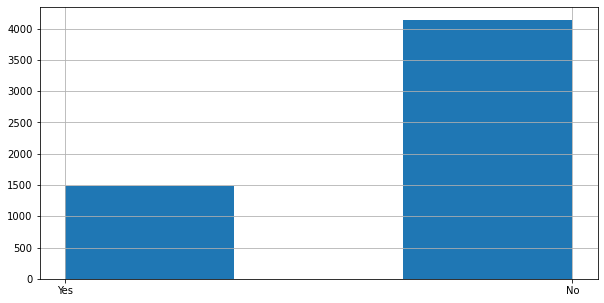

In [16]:
print("                  Histogram of Churn")
df.Churn.hist(bins=3)

### Hur ser fördelningen av target datan ut? Är den jämt fördelad? Om inte, kan det ställa till med problem?
The target labels are not evenly distributed and the number of "No" targets is almost three times the "yes" ones. That might cause a problem in Modeling, and the model might work better for "No" labels compared to the "yes" due to the higher datapoints it includes.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

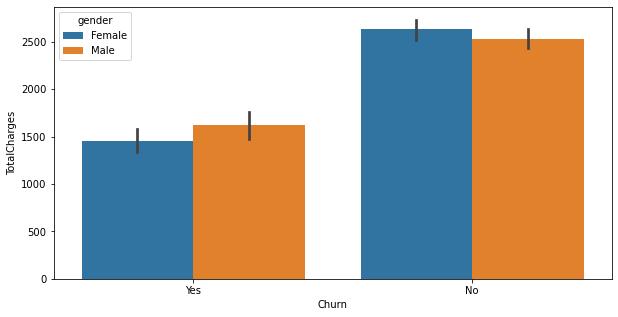

In [19]:
sns.barplot(x='Churn', y='TotalCharges', hue='gender', data=df)

> Checked if gender has considerable effect on the target, but no.

#### Encoding Object datatypes to numerics

In [20]:
def encode_attribute(DF, columns):
    LE = LabelEncoder()
    for c in columns:
        LE.fit(DF[c])
        DF[c] = LE.transform(DF[c])
    return DF
    

In [21]:
toEncode = df.columns.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])
toEncode

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
encode_attribute(df, toEncode)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,25.20,25.20,1
1,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,1,20.05,95.55,0
2,0,1,1,0,60,1,2,1,2,2,2,2,2,2,2,1,0,116.05,6925.90,0
3,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,1,3,20.50,104.30,0
4,1,0,1,1,45,1,2,1,0,2,2,0,0,2,1,1,1,95.00,4368.85,0


In [23]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

#### Prepairing Training data:

In [24]:
X_train = df.drop(columns='Churn')
y_train = df['Churn']

### Trainig an XGBoost:

In [25]:
CLF = xgb.XGBClassifier()

In [26]:
CLF.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Prepairing Test data:

In [27]:
df2 = pd.read_csv('../Data/churn_test.csv')

In [28]:
df2.shape

(1409, 21)

In [29]:
df2 = df2.drop(['customerID'], axis=1)

In [30]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [31]:
df2['TotalCharges'] =  pd.to_numeric(df2['TotalCharges'], errors='coerce')

In [32]:
Nulls = pd.isnull(df2['TotalCharges'])
df2[Nulls]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
765,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
910,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1190,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [33]:
df2 = df2.dropna()
df2.shape

(1406, 20)

In [34]:
encode_attribute(df2, toEncode)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,3,0,1,0,0,2,0,0,0,2,0,0,3,40.30,92.50,0
1,1,0,0,0,42,1,2,1,0,2,0,0,2,2,0,1,2,101.75,4273.45,1
2,1,0,1,1,43,1,2,1,0,0,2,2,2,2,1,1,1,104.30,4451.85,0
3,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,3,70.60,70.60,0
4,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,25,1,0,1,2,0,2,2,2,2,0,1,2,105.50,2686.05,0
1405,0,0,1,1,45,0,1,0,2,0,0,0,2,2,0,1,0,50.90,2333.85,0
1406,1,0,0,0,10,1,0,0,0,0,0,0,0,0,0,1,2,45.55,402.60,1
1407,1,0,1,1,38,1,2,0,0,2,2,0,2,2,1,0,1,78.95,2862.55,0


<AxesSubplot:>

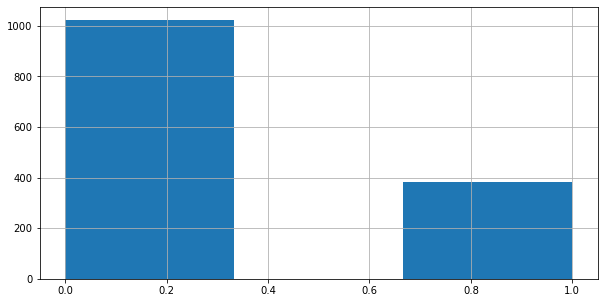

In [41]:
df2.Churn.hist(bins=3)

In [35]:
X_test = df2.drop(columns='Churn').values
y_test = df2['Churn'].values

In [36]:
y_test

array([0, 1, 0, ..., 1, 0, 0])

### Predicting with the test data and geting accuracy score:

In [37]:
Predecit = CLF.predict(X_test)
accuracy_score(y_test, Predecit)


0.7773826458036984

In [122]:
CLF.score(X_test,y_test)

0.7773826458036984

### Analysera vilka attribut som har störst påverkan

In [43]:
CLF.feature_importances_

array([0.01779948, 0.02015251, 0.01577752, 0.01810354, 0.03296117,
       0.02138562, 0.02276788, 0.14001547, 0.07543766, 0.02041855,
       0.01912231, 0.05646179, 0.02043856, 0.03561397, 0.3960033 ,
       0.02314528, 0.01976273, 0.02201917, 0.0226136 ], dtype=float32)

In [54]:
importance = pd.DataFrame({'Attribute':df2.columns[0:19],
                       'Importance':CLF.feature_importances_})
importance

,Attribute,Importance
0,gender,0.017799
1,SeniorCitizen,0.020153
2,Partner,0.015778
3,Dependents,0.018104
4,tenure,0.032961
5,PhoneService,0.021386
6,MultipleLines,0.022768
7,InternetService,0.140015
8,OnlineSecurity,0.075438
9,OnlineBackup,0.020419


<BarContainer object of 19 artists>

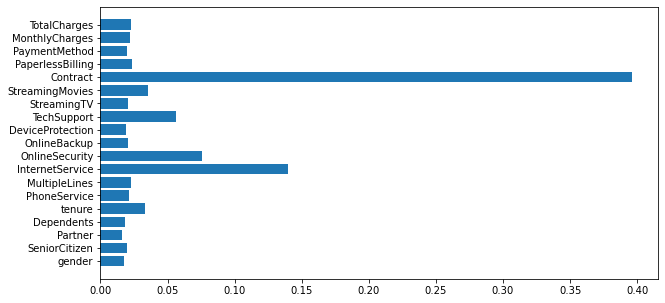

In [56]:
plt.barh(df2.columns[0:19],CLF.feature_importances_)

> According to the built-in feature_importance, kind of "Contract" has the largest effect on the Modeling results and after that "internet service". Likely longer the contract type, less the probablity to churn. We see that in the bar plot below. </br>
On the other hand "Partner" and "gender" has the least effect.

In [57]:
df_orig = pd.read_csv('../Data/churn_train.csv')

<AxesSubplot:xlabel='Churn'>

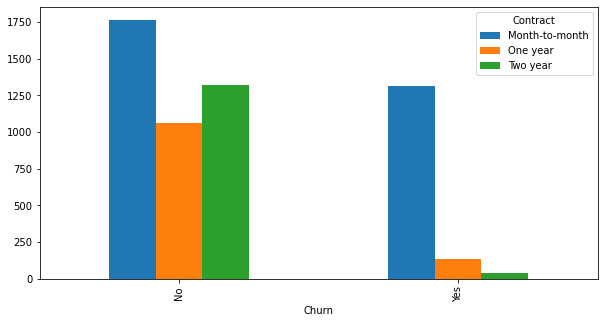

In [63]:
CrossTab2 = pd.crosstab(index=df_orig['Churn'], columns=df_orig['Contract'])
CrossTab2.plot.bar()

<AxesSubplot:xlabel='Churn'>

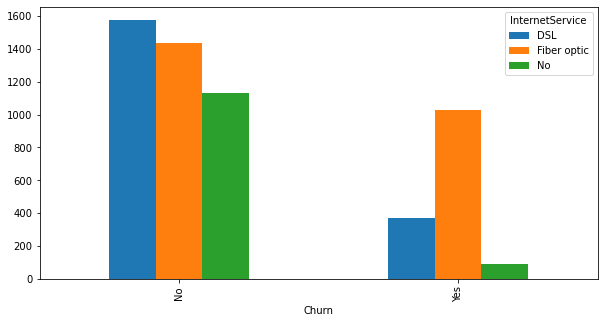

In [64]:
CrossTab3 = pd.crosstab(index=df_orig['Churn'], columns=df_orig['InternetService'])
CrossTab3.plot.bar()

> The number of Curns is higher in the Customers that used Fiber optic internet service.

### Confusion Matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


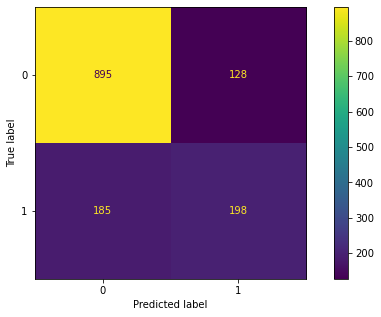

In [40]:
plot_confusion_matrix(CLF, X_test, y_test)
plt.show()

> According to the nubmers in Confudion matrix, Model works good for the "0" (i.e. No) labels. the number of True predictions (895) is almost 7 times larger than the number of False predictions (128). </br>
However the model works faint for label "1" (i.e. Yes), and the number of True (198) and False (185) predictions are almost equal. That should be affected by the lower number of datapoints within this label.